In [1]:
# Title:     SmartHome Dataset
# Authors:   Aline J
# Date:      01/06/2020
# Goal:      Analyze and predict energy use efficiency 
#            in a smarthouse during a year under variable weather conditions.

# Questions: 
# 1) What are the variables that control generated energy? 
#Temperature and humidity explain 76% of the variability
# 2) What are the variables that control used energy? 
# Home office, visibility, and living room are the rooms where more energy is used. 
# 75.89% of the variability on the data is explained by those variables in the dataset.
# 3) What are the variables that control energy efficiency?

# Method. Unsupervised Machine learning Method, specifically random forest regression analysis.
# Results: Used Monthly CleanData
#         Several attempts to run the analysis were done at differen frequencies. 
#         Only Monthly frequency data resulted the highest accuracy (76%) vs Minute data (0.01%).  
#         The minimum random state of 50, was enough to explain the variability in the dataset.  
#         The same accuracy was yield when running random state of 1000.



In [2]:
### Begins Here ####
# 1. Import dependencies
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
# Other dependencies
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 2. Import Raw data file into a data frame
csv_path = "Data/CleanData_per_month.csv"
df = pd.read_csv(csv_path,   parse_dates=True)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 12 rows and 24 columns


In [6]:
df.head(12)

,Unnamed: 0,gen,use,House overall,Furnace,Home office,Living room,Wine cellar,Garage door,Kitchen,...,Dishwasher,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint
0,2016-01-31,2596.565467,46256.153317,46256.153317,20272.447383,4043.940117,1921.156633,840.762533,605.041667,462.033249,...,1613.572299,1273505.14,27211.88,423867.34,972677.20,4.499335e+07,345774.82,9576194.0,52.4958,734720.96
1,2016-02-29,2704.221700,41558.035267,41558.035267,19171.333067,2850.642583,1408.870900,832.488483,572.159733,411.821185,...,1399.090831,1272524.82,26287.66,370827.64,1019057.06,4.240894e+07,335978.38,9005914.0,191.4000,773126.34
2,2016-03-31,3795.807367,34026.880883,34026.880883,13046.526433,3511.736400,1585.980033,1268.479517,614.368167,403.409092,...,1506.501997,1893779.82,27006.82,415287.06,1725778.62,4.532512e+07,348506.48,8826994.0,102.7296,1266782.82
3,2016-04-30,3893.534950,29662.845900,29662.845900,9393.876000,3173.250717,1571.712033,1548.467600,627.425083,311.436781,...,1443.403725,2009284.86,24343.16,407053.96,1906766.44,4.396823e+07,279707.68,7829250.0,106.1054,1266699.98
4,2016-05-31,3670.712050,25550.843150,25550.843150,5957.877471,2768.990462,1179.055583,1561.469854,617.532683,297.327372,...,1180.812253,2741102.92,28744.40,413311.66,2718423.98,4.529205e+07,272747.04,8057126.0,101.3780,2117725.96
5,2016-06-30,4496.177683,23173.293267,23173.293267,4017.613567,3293.974683,1183.945700,2004.028550,627.113300,283.716184,...,1072.109282,2939548.82,26447.80,420454.98,2935773.02,4.373445e+07,293730.26,9856594.0,71.1080,2273238.24
6,2016-07-31,4092.765050,52167.125350,52167.125350,7656.294050,4055.020917,1044.151083,2897.184217,653.969250,405.868948,...,1298.198965,3266665.62,31076.81,416655.03,3277066.06,4.529199e+07,237031.33,8726364.0,156.1155,2738618.11
7,2016-08-31,4192.526816,61786.433333,61786.433333,8726.455583,4415.748867,1789.761367,4397.207150,616.895167,538.996528,...,1355.582418,3239061.56,32280.40,425692.47,3265930.24,4.541104e+07,259527.83,8277603.0,121.3473,2774927.02
8,2016-09-30,3486.357550,31955.496867,31955.496867,4671.403867,3619.136700,1466.955383,2787.093100,622.384900,542.107678,...,1408.481553,2590152.45,32500.29,391836.09,2580783.93,4.413522e+07,238256.40,7197901.0,101.5911,2205009.54
9,2016-10-31,2399.078134,30222.929933,30222.929933,6569.421133,3928.120117,1436.985717,1328.242733,648.891350,485.023292,...,1334.970093,2139351.02,31915.44,419083.32,2037498.29,4.544077e+07,296114.39,10128871.0,95.1444,1709405.81


In [7]:
# Calculating Energy efficiency
df['EneEffi'] = df['use']-df['gen']

In [8]:
# Data Preparation
df.columns
#df.dtypes 
#CleanData.tail()

Index(['Unnamed: 0', 'gen', 'use', 'House overall', 'Furnace', 'Home office',
       'Living room', 'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
       'Fridge', 'Microwave', 'Dishwasher', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'windBearing', 'precipIntensity', 'dewPoint', 'EneEffi'],
      dtype='object')

In [9]:
inputdf = df.filter(items=[ 'EneEffi', 'Furnace', 'Home office',
                            'Living room', 'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                            'Fridge', 'Microwave', 'Dishwasher', 'temperature', 'humidity',
                            'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
                            'windBearing', 'precipIntensity', 'dewPoint'])

In [10]:
# Running RF with all the data to investigate the driving variables of energy efficiency at a 1min resolution
#my_data.dtypes 
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
features.columns

Index(['EneEffi', 'Furnace', 'Home office', 'Living room', 'Wine cellar',
       'Garage door', 'Kitchen', 'Barn', 'Well', 'Fridge', 'Microwave',
       'Dishwasher', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'windBearing',
       'precipIntensity', 'dewPoint'],
      dtype='object')

In [11]:
# Labels are the values we want to predict
labels = np.array(features['EneEffi'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('EneEffi', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [12]:
# Training and Testing Sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [13]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (9, 20)
Training Labels Shape: (9,)
Testing Features Shape: (3, 20)
Testing Labels Shape: (3,)


In [14]:
feature_list.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Train the model on training data
rf.fit(train_features, train_labels);

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 8512.05 degrees

Mean Absolute Error: 9528.9 degrees.


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 95.96 %.  

Accuracy: 74.9 %.


In [18]:
# What are the top predictor variables that regulate power used in a smarthome?
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [19]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [20]:
## Export the image to a dot file
#export_graphviz(tree, out_file = 'tree', feature_names = feature_list, rounded = True, precision = 1)
## Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree')
## Write graph to a png file
#graph.write_png('tree.png')

In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Home office          Importance: 0.24
Variable: visibility           Importance: 0.13
Variable: Living room          Importance: 0.11
Variable: Wine cellar          Importance: 0.06
Variable: apparentTemperature  Importance: 0.06
Variable: pressure             Importance: 0.06
Variable: Dishwasher           Importance: 0.05
Variable: Furnace              Importance: 0.04
Variable: Kitchen              Importance: 0.04
Variable: Barn                 Importance: 0.03
Variable: dewPoint             Importance: 0.03
Variable: Garage door          Importance: 0.02
Variable: Fridge               Importance: 0.02
Variable: Microwave            Importance: 0.02
Variable: temperature          Importance: 0.02
Variable: humidity             Importance: 0.02
Variable: precipIntensity      Importance: 0.02
Variable: Well                 Importance: 0.01
Variable: windSpeed            Importance: 0.01
Variable: windBearing          Importance: 0.0


In [22]:
plt.figure();
feature_importances.plot();

AttributeError: 'list' object has no attribute 'plot'

<Figure size 432x288 with 0 Axes>

In [24]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=1000)
# Extract the two most important features
important_indices = [feature_list.index('Home office'), feature_list.index('Living room')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

#Note:
#This tells us that temperature and dew point are the two most important variables to regulate generated energy 

Mean Absolute Error: 10268.06 degrees.
Accuracy: 71.73 %.


In [ ]:
# Save the model
#model.save("voice_model_trained.h5")

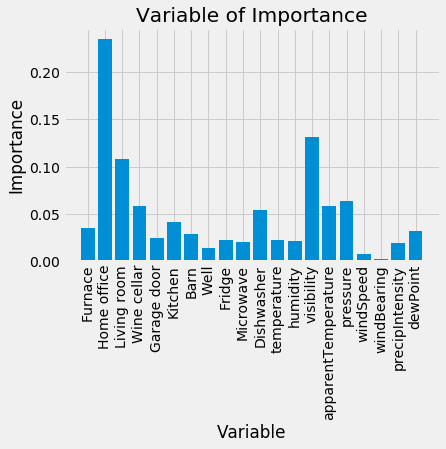

In [26]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variables of Importance');